<a href="https://colab.research.google.com/github/dsreliete/Womakerscode-DA-colabs/blob/main/Base_de_Sal%C3%A1rios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
url = 'https://drive.google.com/file/d/1ZqJw1UOtb993zk48LxXZIewxifJnbrTy/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [ ]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,EX,FT,Data Science Director,212000,USD,212000,US,0,US,M
1,2023,EX,FT,Data Science Director,190000,USD,190000,US,0,US,M
2,2023,MI,FT,Business Intelligence Engineer,35000,GBP,43064,GB,0,GB,M
3,2023,MI,FT,Business Intelligence Engineer,35000,GBP,43064,GB,0,GB,M
4,2023,SE,FT,Machine Learning Engineer,245700,USD,245700,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
8800,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
8801,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
8802,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
8803,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [ ]:
df.experience_level.value_counts()

,count
experience_level,
SE,6336
MI,1732
EN,468
EX,269


#Afirmações a partir da distribuição de probabilidade

1. Qual a probabilidade de um entry level ganhar igual a média de um experience?

4. Qual a probabilidade de um entry level ganhar igual a um senior?

5. Qual a probabilidade de um entry level ganhar igual a um mid level?

In [ ]:
from scipy.stats import norm
EN = df[df['experience_level'] == 'EN']
EX = df[df['experience_level'] == 'EX']
SE = df[df['experience_level'] == 'SE']
MI = df[df['experience_level'] == 'MI']

EX_remote = df[(df['experience_level'] == 'EX') & (df['remote_ratio'] == 100)]
EX_remote_N = df[(df['experience_level'] == 'EX') & (df['remote_ratio'] == 0)]

In [ ]:
desvio_EN = EN['salary_in_usd'].std()
desvio_EX = EX['salary_in_usd'].std()
media_EN = EN['salary_in_usd'].mean()
media_EX = EX['salary_in_usd'].mean()
media_SE = SE['salary_in_usd'].mean()
media_MI = MI['salary_in_usd'].mean()
media_EX_remote = EX_remote['salary_in_usd'].mean()
desvio_EX_remote = EX_remote['salary_in_usd'].std()
media_EX_remote_N = EX_remote_N['salary_in_usd'].mean()
desvio_EX_remote_N = EX_remote_N['salary_in_usd'].std()

In [ ]:
print(media_EN)
print(desvio_EN)
print(desvio_EX_remote)
print(media_EX_remote)
print(desvio_EX_remote_N)
print(media_EX_remote_N)

87676.76282051283
55799.44695006322
73642.19621174804
203814.36936936938


In [ ]:
#Qual a probabilidade de um entry level ganhar igual a média de um experience?
z = (media_EX - media_EN)/desvio_EN
prob = (1 - norm.cdf(z)) * 100
print(f'A probabilidade é de {prob:,.2f}%')

A probabilidade é de 3.46%


In [ ]:
#Qual a probabilidade de um entry level ganhar igual a média de um senior?
z = (media_SE - media_EN)/desvio_EN
prob = (1 - norm.cdf(z)) * 100
print(f'A probabilidade é de {prob:,.2f}%')

A probabilidade é de 9.18%


In [ ]:
#Qual a probabilidade de um entry level ganhar igual a média de um mid level?
z = (media_MI - media_EN)/desvio_EN
prob = (1 - norm.cdf(z)) * 100
print(f'A probabilidade é de {prob:,.2f}%')

A probabilidade é de 31.42%


#Afirmações a partir de intervalo de confiança

In [ ]:
import numpy as np
import scipy.stats as st


In [ ]:
# 95% a probabilidade do salário do experience estar entre US$ 51279 e US$ 326825
conf_int = st.norm.interval(0.95, loc=media_EX, scale=desvio_EX)
print(f"media: {media_EX:.2f}")
print("intervalo de confiança: ")
print(conf_int)

media: 189052.62
intervalo de confiança: 
(51279.37586420769, 326825.8583365358)


In [ ]:
# 95% a probabilidade do salário do experience remoto estar entre US$ 59478 e US$ 348150
conf_int = st.norm.interval(0.95, loc=media_EX_remote, scale=desvio_EX_remote)
print(f"media: {media_EX_remote:.2f}")
print("intervalo de confiança: ")
print(conf_int)

media: 203814.37
intervalo de confiança: 
(59478.3170519112, 348150.42168682755)


In [ ]:
# 95% a probabilidade do salário do experience não remoto estar entre US$ 51740 e US$ 310465
conf_int = st.norm.interval(0.95, loc=media_EX_remote_N, scale=desvio_EX_remote_N)
print(f"media: {media_EX_remote_N:.2f}")
print("intervalo de confiança: ")
print(conf_int)

media: 181102.94
intervalo de confiança: 
(51740.06742009972, 310465.81257990026)


#Afirmações com testes de hipótese

##Teste T

Comparação entre os salários de quem trabalha remoto e não remoto<br>
H0: As médias entre os grupos são iguais<bR>
H1: As médias entre os grupos são diferentes

In [ ]:
df.groupby('remote_ratio').salary_in_usd.mean().sort_values(ascending=False)

remote_ratio
0      155592.481944
100    144149.241965
50      82162.119266
Name: salary_in_usd, dtype: float64

In [ ]:
full = df[df['remote_ratio'] == 100].salary_in_usd
zero = df[df['remote_ratio'] == 0].salary_in_usd

In [ ]:
# Probabilidade menor que 5% : os salários de remoto e não remoto tem diferença estatística
from scipy.stats import ttest_ind
stat, p = ttest_ind(full, zero)
print(f'T-statistic: {stat}')
print(f'P-value: {p}')

T-statistic: -8.168852183412765
P-value: 3.5557126465016824e-16


##Anova a um fator


Comparação entre os salários de quem trabalha remoto, não remoto e híbrido<br>
H0: As médias entre os grupos são iguais<bR>
H1: As médias entre os grupos são diferentes

In [ ]:
df['salary_in_usd'].groupby(df['remote_ratio']).describe()

,count,mean,std,min,25%,50%,75%,max
remote_ratio,,,,,,,,
0,5289.0,155592.481944,64394.057329,15000.0,110000.0,145000.0,193600.0,450000.0
50,218.0,82162.119266,61140.340248,15680.0,43578.5,65461.5,104756.0,423000.0
100,3298.0,144149.241965,61065.018750,15000.0,100000.0,140250.0,182750.0,615201.0


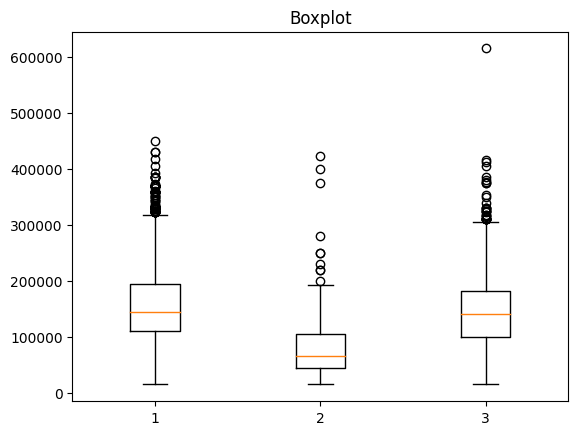

In [ ]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot')
ax1.boxplot([df[df['remote_ratio']== 0]['salary_in_usd'], df[df['remote_ratio']== 50]['salary_in_usd'], df[df['remote_ratio']== 100]['salary_in_usd']])
plt.show()

In [ ]:
# Probabilidade menor que 5% : entre salários de remoto e não remoto e híbrido, tem diferença estatística
# A média entre os grupos não são iguais
import scipy.stats as stats
stats.f_oneway(df['salary_in_usd'][df['remote_ratio'] == 0],
             df['salary_in_usd'][df['remote_ratio'] == 50],
             df['salary_in_usd'][df['remote_ratio'] == 100])

F_onewayResult(statistic=160.70508298849276, pvalue=2.8232301347561676e-69)

##Teste Anova a dois fatores

Comparação entre os salários com o remote ratio<br>
H0: As médias entre os grupos são iguais<bR>
H1: As médias entre os grupos são diferentes

In [ ]:
df.remote_ratio.value_counts()

0      5289
100    3298
50      218
Name: remote_ratio, dtype: int64

In [ ]:
df.experience_level.value_counts()

SE    6336
MI    1732
EN     468
EX     269
Name: experience_level, dtype: int64

In [ ]:
df.groupby(['experience_level', 'remote_ratio'])['salary_in_usd'].describe()

count           mean           std      min  \
experience_level remote_ratio                                                 
EN               0              208.0  104731.740385  49683.628068  15000.0   
                 50              71.0   64563.366197  45780.832707  18000.0   
                 100            189.0   77590.074074  60084.006424  15000.0   
EX               0              150.0  181102.940000  66002.678417  15000.0   
                 50               8.0  133289.750000  53526.801361  76309.0   
                 100            111.0  203814.369369  73642.196212  55000.0   
MI               0             1031.0  124535.605238  58033.284188  18000.0   
                 50              85.0   76940.529412  58615.852581  15680.0   
                 100            616.0  103395.089286  49043.826328  15000.0   
SE               0             3900.0  165534.047436  62607.005972  18907.0   
                 50              54.0  105945.925926  72688.838536  20171.0   
                 100           2382.0  157189.297229  53751.328560  15809.0   

                                     25%       50%       75%       max  
experience_level remote_ratio                                           
EN               0              65000.00   97300.0  135000.0  281700.0  
                 50             29875.50   50000.0   82849.5  250000.0  
                 100            43096.00   63750.0   94035.0  615201.0  
EX               0             136508.00  177550.0  220000.0  353200.0  
                 50             95270.25  128001.0  146800.0  230000.0  
                 100           147500.00  200000.0  250000.0  416000.0  
MI               0              81091.00  115500.0  150000.0  450000.0  
                 50             42197.00   63711.0   90734.0  423000.0  
                 100            66940.00   96742.0  135000.0  340000.0  
SE               0             124600.00  155000.0  203500.0  417937.0  
                 50             61041.75   94614.5  125711.0  399880.0  
                 100           120000.00  153600.0  191475.0  412000.0

In [ ]:
# A média entre os grupos são iguais
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('salary_in_usd ~ experience_level + remote_ratio + experience_level:remote_ratio', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
experience_level,5.227021e+12,3.0,500.481322,2.729460e-300
remote_ratio,2.510771e+11,1.0,72.121036,2.354014e-17
experience_level:remote_ratio,1.536967e+11,3.0,14.716279,1.479272e-09
Residual,3.062526e+13,8797.0,NaN,NaN


**experience_level** = p-valor < 5%, rejeita a hipótese nula, Há diferença entre as médias entre os grupos de nível de experiência <br>
**remote_ratio** = p-valor < 5%, rejeita a hipótese nula, Há diferença entre as médias entre os grupos no formato de trabalho <br>
**experience_level:remote_ratio** = p-valor < 5%, rejeita a hipótese nula, Há interação entre os nível de experiência e o formato de trabalho

##Correlação de Pearson

Avaliar se existe a correlação entre os salários em dólar e outras moedas <br>
H0: A correlação entre as variáveis é igual a 0.<bR>
H1: A correlação entre as variáveis é diferente de 0.

In [ ]:
# Probabilidade menor que 5% : entre salários em outras moedas e salários em dólar, há correlação estatística
from scipy.stats import pearsonr
print(pearsonr(df['salary'],df['salary_in_usd']))

PearsonRResult(statistic=0.0498409566654191, pvalue=2.8818152462580313e-06)
